In [1]:
%matplotlib inline

## Imports

In [2]:
import json
import os

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Globals

In [4]:
# %ls "../runs/MNIST/last/"

In [5]:
RUNS_DIR = "../runs/MNIST/last/"
FILE_NAME_TEMPLATE = "{}_{:02d}.json"

N_RUNS = 60
RESULT_NAMES = ["baseline", "nablasim"]
EXTRACTED_CURVE_KEY = "vl_acc"  # "tr_acc_cumul"

## Data

In [6]:
all_results = {}
for result_name in RESULT_NAMES:
    all_results[result_name] = []
    for i in range(N_RUNS):
        file_path = os.path.join(RUNS_DIR, FILE_NAME_TEMPLATE.format(result_name, i))
        assert os.path.exists(file_path)
        with open(file_path, "rt") as file:
            all_results[result_name].append([json.loads(line) for line in file])
all_results[RESULT_NAMES[0]][0][0].keys()

dict_keys(['batch_idx', 'loss', 'tr_acc_local', 'tr_acc_cumul', 'vl_acc'])

In [7]:
def extract_indices(all_results, index_key="batch_idx"):
    all_extracted_indices = {}
    for name, results in all_results.items():
        curve = results[0]
        all_extracted_indices[name] = np.array([entry[index_key] for entry in curve])
    return all_extracted_indices

In [8]:
def extract_results(all_results, curve_key):
    all_extracted_results = {}
    for name, results in all_results.items():
        extracted_results = []
        for curve in results:
            extracted_results.append([entry[curve_key] for entry in curve])
        extracted_results = np.array(extracted_results)
        all_extracted_results[name] = extracted_results
    return all_extracted_results

## Plots

In [9]:
def plot_curves(indices, curves, name):
    curves_mean, curves_std = curves.mean(0), curves.std(0)
    
    limit = 150
    indices, curves_mean, curves_std = indices[:limit], curves_mean[:limit], curves_std[:limit]
    
    plt.plot(indices, curves_mean, label=name)
    plt.fill_between(indices, curves_mean - curves_std, curves_mean + curves_std, alpha=0.2)

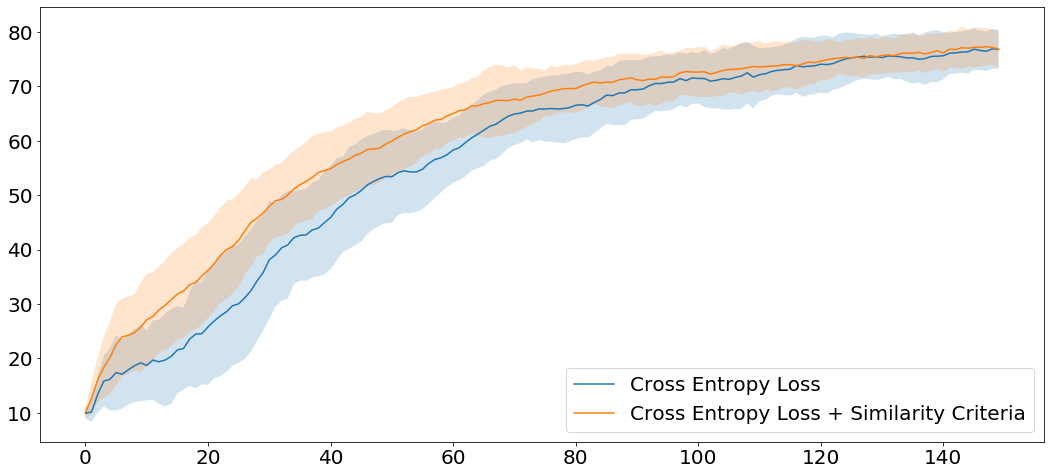

In [10]:
with mpl.rc_context(rc={"figure.figsize": (18, 8), 'font.size': 20}):
    all_extracted_indices = extract_indices(all_results)
    all_extracted_results = extract_results(all_results, EXTRACTED_CURVE_KEY)
    labels = ["Cross Entropy Loss", "Cross Entropy Loss + Similarity Criteria"]
    for name, legend_name in zip(all_extracted_results.keys(), labels):
        indices = all_extracted_indices[name]
        curves = all_extracted_results[name]
        plot_curves(indices, curves, legend_name)
    plt.legend(loc='lower right', prop={'size': 20})
    plt.savefig("./mnist_convergence_18_8.png", dpi="figure", pad_inches=0, bbox_inches="tight")
    plt.show()